ERROR:root:File `'setup_notebook.ipynb.py'` not found.


Now loading mouse J048, run 27
This run has 2101 cells and 16117 frames
microcontroller trial starts occur on average -36.39 ms from galvo trial starts
number of pre frames: 21, number of post frames 21
Shape new array : (2101, 143, 42)
(2101, 143, 42) (2101, 8, 42)


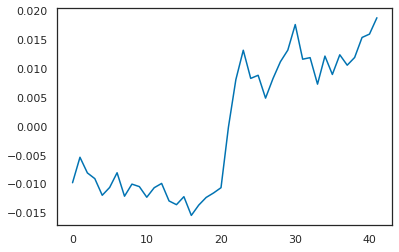

photo stim occurences: {0: 51, 1: 51, 2: 41}
[[26. 25.]
 [25. 26.]
 [ 5. 36.]]


In [1]:
%run setup_PS_data.ipynb

In [2]:
from dPCA import dPCA

dec 0, stim 0, n_test 10
(2101, 25, 42)
dec 0, stim 1, n_test 2
(2101, 17, 42)
dec 0, stim 2, n_test -11
(2101, 4, 42)
dec 1, stim 0, n_test 10
(2101, 25, 42)
dec 1, stim 1, n_test 11
(2101, 26, 42)
dec 1, stim 2, n_test 18
(2101, 33, 42)
(15, 2101, 2, 2, 38)


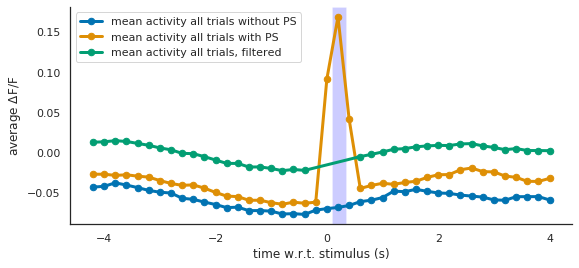

In [10]:
activity = np.zeros((n_com_trials, n_neurons, n_unique_stims, n_unique_dec, n_times))
activity = activity * np.nan
activity_test = np.zeros((n_com_trials, n_neurons, n_unique_stims, n_unique_dec, n_times))
activity_test = activity * np.nan
max_train = 15
nan_trials = np.isnan(np.mean(behaviour_trials, (0, 2)))
min_common = 100
max_common = 0
for dec in range(n_unique_dec):
    for stim in range(n_unique_stims):
        inds_cond = np.logical_and(decision == dec, photostim == stim)
        inds_cond = np.logical_and(inds_cond, np.logical_not(nan_trials))
        occ_table[stim, dec] = inds_cond.sum()
        current_data = np.squeeze(behaviour_trials[:, inds_cond, :])

        if np.sum(inds_cond) == 1:
            current_data = current_data[:, np.newaxis, :]
        n_curr_trials = np.minimum(current_data.shape[1], max_train)

        activity[:n_curr_trials, :, stim, dec, :] = np.swapaxes(current_data[:, :n_curr_trials, :], 0, 1)
        n_test_trials = current_data.shape[1] - max_train
        if n_test_trials > 0:
            activity_test[:n_test_trials, :, stim, dec, :] = np.swapaxes(current_data[:, n_curr_trials:, :], 0, 1)
        else:
            pass
        print(f'dec {dec}, stim {stim}, n_test {n_test_trials}')
        max_common = np.maximum(max_common, n_curr_trials)
        min_common = np.minimum(min_common, n_curr_trials)
        print(current_data.shape)
        
n_com_trials = np.minimum(n_com_trials, max_common)

activity = activity[:n_com_trials, :, :, :, :]
activity_test = activity_test[:2, :, :, :, :]

# activity = activity[:, s1_bool, :, :, :]
# activity_test = activity_test[:, s1_bool, :, :, :]
# n_neurons = np.sum(s2_bool)

n_unique_stims = 2
activity = activity[:, :, :n_unique_stims, :, :]  # filter out PS = 150 trials
activity_test = activity_test[:, :, :n_unique_stims, :, :]  # filter out PS = 150 trials
filter_ps_array = np.concatenate((np.arange(art_gap_start), 
                                  np.arange(art_gap_stop, pre_frames + post_frames)))  # filter out few frames around PS
old_act = activity.copy()
activity = activity[:, :, :, :, filter_ps_array]
activity = activity - np.nanmean(activity[:, :, :, :, :], (0, 2, 3, 4))[np.newaxis, :, np.newaxis, np.newaxis, np.newaxis]
activity_av = np.nanmean(activity, 0)

activity_test = activity_test[:, :, :, :, filter_ps_array]
activity_test = activity_test - np.nanmean(activity_test[:, :, :, :, :], (0, 2, 3, 4))[np.newaxis, :, np.newaxis, np.newaxis, np.newaxis]
activity_av_test = np.nanmean(activity_test, 0)


plt.rcParams['figure.figsize'] = (9, 4)
im_freq = 5
plt.axvspan(xmin=0.1, xmax=0.35, 
            ymin=-0.05, ymax=1, facecolor='blue', alpha=0.2)
time_array_plot = (np.arange(old_act.shape[4]) - pre_frames) / im_freq
plt.plot(time_array_plot, np.nanmean(old_act, (0, 1, 3)).T[:, 0], '.-', label='mean activity all trials without PS', linewidth=3, markersize=13)
plt.plot(time_array_plot, np.nanmean(old_act, (0, 1, 3)).T[:, 1], '.-', label='mean activity all trials with PS', linewidth=3, markersize=13)
plt.plot((filter_ps_array - pre_frames) / im_freq, np.nanmean(activity, (0, 1, 2, 3)), '.-', label='mean activity all trials, filtered', markersize=13, linewidth=3)
plt.legend(); plt.xlabel('time w.r.t. stimulus (s)'); plt.ylabel('average $\Delta$F/F'); sns.despine()
print(activity.shape)


In [33]:
# plt.rcParams['figure.figsize'] = (9, 4)
# im_freq = 5

# fake_plot = {x: np.zeros_like(time_array_plot) for x in range(3)}
# fake_plot[0][22:24] = 1
# fake_plot[1][22:32] = np.exp(-0.5 * np.arange(10))
# fake_plot[2][22:40] = np.exp(-0.2 * np.arange(18))

# plt.axvspan(xmin=0.1, xmax=0.35, 
#             ymin=-0.05, ymax=1, facecolor='blue', alpha=0.2)
# plt.plot(time_array_plot, fake_plot[0], 'k', linewidth=2, label='regressor?')
# plt.plot(time_array_plot, fake_plot[1], 'k--', linewidth=3, label='or this regressor?')
# plt.plot(time_array_plot, fake_plot[2], 'k:', linewidth=3, label='or perhaps this regressor??')
# plt.xlim([time_array_plot[0], time_array_plot[-1]])
# plt.legend(); plt.xlabel('time w.r.t. stimulus (s)'); plt.ylabel('average $\Delta$F/F'); sns.despine()


# demixing PCA

In [34]:
dpca = dPCA.dPCA(labels='sdt', n_components=5, regularizer='auto')
dpca.protect = ['t']

# activity = activity[:, inds_pos_r2, :, :, :]
# activity_av = activity_av[inds_pos_r2, :, :, :]
Z = dpca.fit_transform(activity_av, activity)
reg_param = dpca.regularizer

recon = {}
recon['st'] = (dpca.reconstruct(activity_av, marginalization='st').copy() +
               dpca.reconstruct(activity_av, marginalization='s').copy())
recon['dt'] = (dpca.reconstruct(activity_av, marginalization='dt').copy() +
               dpca.reconstruct(activity_av, marginalization='d').copy())
recon['sdt'] = (dpca.reconstruct(activity_av, marginalization='sdt').copy() +
               dpca.reconstruct(activity_av, marginalization='sd').copy())
recon['t'] = dpca.reconstruct(activity_av, marginalization='t').copy()
recon['full'] = np.zeros_like(recon['st'])
for cond in ['t', 'st', 'dt', 'sdt']:
    recon['full'] += recon[cond]
    
tmp = dpca.transform(activity_av, marginalization=None)  # call this function to recompute explained_variance_ratio_ (for something reason/buggy this is reset upon every marginalizaiton for all dimensions that are not the marginalization)
reg_param_str_sn = '{:.0e}'.format(dpca.regularizer)
save_fig = False

You chose to determine the regularization parameter automatically. This can
                    take substantial time and grows linearly with the number of crossvalidation
                    folds. The latter can be set by changing self.n_trials (default = 3). Similarly,
                    use self.protect to set the list of axes that are not supposed to get to get shuffled
                    (e.g. upon splitting the data into test- and training, time-points should always
                    be drawn from the same trial, i.e. self.protect = ['t']). This can significantly
                    speed up the code.
Start optimizing regularization.
Starting trial  1 / 3
Starting trial  2 / 3
Starting trial  3 / 3
Optimized regularization, optimal lambda =  0.009297222253682942
Regularization will be fixed; to compute the optimal                    parameter again on the next fit, please                    set opt_regularizer_flag to True.


In [35]:
valid_Z = dpca.transform(activity_av_test)

In [36]:
# trainX, validX = dpca.train_test_split(activity_av, activity)
# trainZ = dpca.fit_transform(trainX)
# validZ = dpca.transform(validX)

# keys = list(dpca.marginalizations.keys())
# keys.remove(dpca.labels[-1])

In [37]:
# # (activity_av.shape)
# trainZ['st'].shape

In [38]:
# dpca.marginalizations['st']

In [39]:
# print(set(range(len(activity_av.shape)-1)))# - axset
# print(set(range(len(activity_av.shape)-1)) - axset)

In [40]:
# axes = {1, 2}
# axes = tuple(np.array(list(axes)) + 1)
# # np.mean(Z['s'], axis=axes)
# # axes
# Z['s'].shape

In [41]:
# for key in keys:
#     print(f'key {key}')
#     ncomps = dpca.n_components if type(dpca.n_components) == int else dpca.n_components[key]

#     # mean over all axis not in key
#     axset = dpca.marginalizations[key]
#     axset = axset if type(axset) == set else set.union(*axset)
#     axes = set(range(len(activity_av.shape)-1)) - axset
#     print(f'axes {axes}'a)
#     for ax in axes:
#         print(key, trainZ[key].shape, ax+1)
#         trainZ[key] = np.mean(trainZ[key],axis=ax+1)
#         validZ[key] = np.mean(validZ[key],axis=ax+1)


In [42]:
# sign = dpca.significance_analysis(activity_av, activity, axis=True, n_shuffles=20, n_splits=2, 
#                                   n_consecutive=1)

In [43]:
# plt.subplot(311)
# plt.plot(filter_ps_array, np.logical_or(sign['s'], sign['st'])[:2, :].T)

# plt.subplot(312)
# plt.plot(filter_ps_array, np.logical_or(sign['d'], sign['dt'])[:2, :].T)

# plt.subplot(313)
# plt.plot(filter_ps_array, np.logical_or(sign['sd'], sign['sdt'])[:2, :].T)

In [44]:
# Z['st'][0, 0, :, :] + Z['st'][0, 1, :, :]
# Z['dt'][0, :, 0, :] + Z['dt'][0, :, 1, :]

In [45]:
dec_color = {0: 'purple', 1: 'green'}
stim_alpha = {0: 0.3, 1: 0.7, 2: 1}
# stim_alpha = {n_x: x for n_x, x in enumerate(np.linspace(0.2, 1, len(unique_ps_numbers)))}
title_cond = {'t': 'condition indep.', 's': 'PS dependent',
              'd': 'lick dependent', 'sd': 'lick / PS interaction'}
label_cond = {#'stim': {n_x: str(x) for n_x, x in enumerate(unique_ps_numbers)},
                'stim': {0: 'no PS', 1: 'PS', 2: '150'}, 
              'dec': {0: 'no lick', 1: 'lick'}}
i_pc = 0  # what dPC to plot

def plot_condition(ax, dpca_Z, cond, pc_plot=i_pc):
    """Function to plot 1 condition on axis object ax"""
    for dec in range(n_unique_dec):  # loop through all conditions
        for stim in range(n_unique_stims):
            plot_array = None
            plot_array = dpca_Z[cond][pc_plot, stim, dec, :].copy()  # data to plot
            expl_var = dpca.explained_variance_ratio_[cond][pc_plot].copy()  # extra 
            if cond != 't':
                plot_array += dpca_Z[cond + 't'][pc_plot, stim, dec, :].copy()
                expl_var += dpca.explained_variance_ratio_[cond + 't'][pc_plot].copy()
            ax.plot(filter_ps_array[:art_gap_start],
                    plot_array[:art_gap_start], label=f'{label_cond["stim"][stim]}, {label_cond["dec"][dec]}',
                     c=dec_color[dec], alpha=stim_alpha[stim], linewidth=2)
            ax.plot(filter_ps_array[art_gap_start:],
                    plot_array[art_gap_start:], #label=f'{label_cond["stim"][stim]}, {label_cond["dec"][dec]}',
                     c=dec_color[dec], alpha=stim_alpha[stim], linewidth=2)
#     if i_row == 1:
#         ax.set_xlabel('Time (frames)'); 
#     if i_col == 0:
#         ax.set_ylabel('Activity ($\Delta$F/F)'); 
    ax.set_title(title_cond[cond] + f' {pc_plot + 1}st dPC\n$R^2$: {np.round(expl_var * 100, 1)}%')
    if i_row == 0 and i_pc == 0:
#         ax.legend()
        ax.legend(bbox_to_anchor=(-1.45, 1.05), loc='upper left', 
                  borderaxespad=0., prop={'size': 15})
    data_1st_pc = dpca_Z[cond][0, :, :, :].copy()
#     print([np.min(data_1st_pc), np.max(data_1st_pc)])
    ax.set_ylim([-5, 5])
        

<Figure size 1008x720 with 0 Axes>

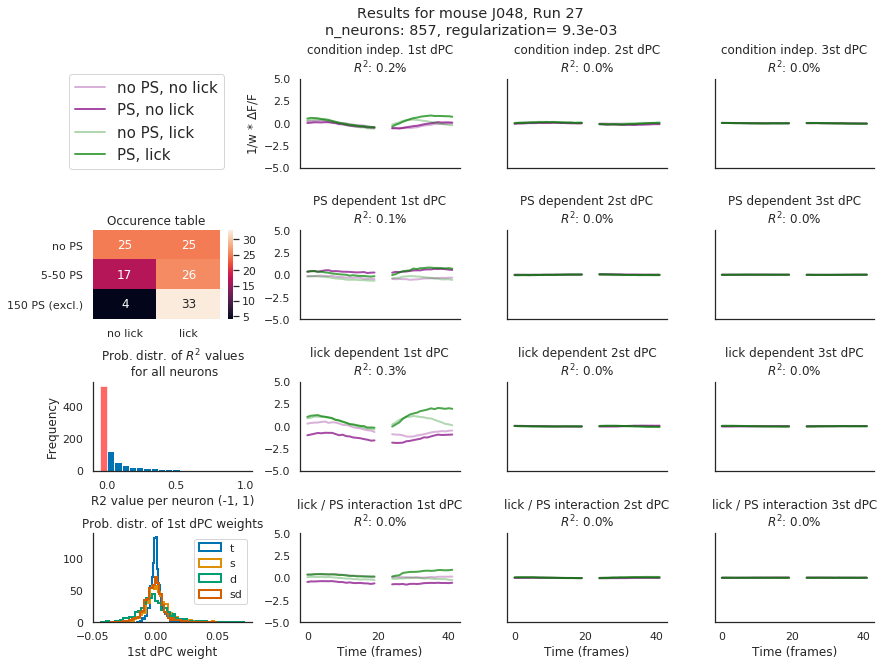

In [46]:
plot_Z = Z
plt.rcParams['figure.figsize'] = (14, 10)
plt.subplots_adjust(hspace=0.6, wspace=0.4)
fig, axes = plt.subplots(4, 4, gridspec_kw={'wspace':0.3, 'hspace': 0.7})
save_fig = True
for i_row in range(4):
    for i_pc in range(3):
        plot_condition(axes[i_row][i_pc + 1], plot_Z, list(title_cond.keys())[i_row], pc_plot=i_pc)
        sns.despine()
        
axes[0][0].set_xticks([]); axes[0][0].set_yticks([])
axes[0][0].set_visible(False);
        
occ_heatmap = sns.heatmap(occ_table, annot=True, xticklabels=['no lick', 'lick'], 
            yticklabels=['no PS', '5-50 PS', '150 PS (excl.)'], ax=axes[1][0])
occ_heatmap.set_yticklabels(occ_heatmap.get_yticklabels(), rotation=0)
b, t = occ_heatmap.get_ylim() # correct for default cut off
b += 0.5 # see https://github.com/mwaskom/seaborn/issues/1773
t -= 0.5 # 
axes[1][0].set_ylim(b, t) # update the ylim(bottom, top) values
axes[1][0].set_title('Occurence table')

r2_dpca =  1- (np.mean(np.power(activity_av - recon['full'], 2), (1, 2, 3)) /
            np.mean(np.power(activity_av - np.mean(activity_av, 3)[:, :,:, np.newaxis], 2), (1, 2, 3)))
axes[2][0].hist(r2_dpca, bins=np.linspace(0, 1, 20), density=False);
axes[2][0].hist(np.clip(r2_dpca, a_min=-0.03, a_max=0.001), bins=np.linspace(-0.05, -0.001, 2), 
                density=False, color='red', alpha=0.6);
axes[2][0].set_ylabel('Frequency')
axes[2][0].set_xlabel('R2 value per neuron (-1, 1)'); 
axes[2][0].set_title('Prob. distr. of $R^2$ values\n for all neurons')

axes[3][0].hist(dpca.D['t'][:, 0], bins=50, label='t',
        histtype='step', linewidth=2, density=True);
for cond in ['s', 'd', 'sd']:
    axes[3][0].hist((dpca.D[cond] + dpca.D[cond + 't'])[:, 0], bins=50, label=cond,
            histtype='step', linewidth=2, density=True);
axes[3][0].set_title(f'Prob. distr. of 1st dPC weights')
axes[3][0].legend(); axes[3][0].set_xlabel(f'1st dPC weight'); #plt.ylabel('PDF')

for i_row in range(3):
    for i_col in range(1, 4):
        axes[i_row][i_col].set_xticks([])
for i_row in range(4):
    for i_col in range(2, 4):
        axes[i_row][i_col].set_yticks([])
axes[0][1].set_ylabel('1/w * $\Delta$F/F')
for i_col in range(1, 4):
    axes[3][i_col].set_xlabel('Time (frames)')

plt.suptitle(f'Results for mouse {mouse}, Run {run_number}\n' \
             f'n_neurons: {activity.shape[1]}, regularization= ' +
             np.format_float_scientific(reg_param, precision=1));
if save_fig:
    plt.savefig(f'dPCA_results/dPCA_{mouse}_{run_number}_reg{reg_param_str_sn}.pdf') 
    save_fig = False

### use sklearn metric for automated variance weighing
### total r2? -> sum of individual r2 values?



In [16]:
def angle_vectors(v1, v2):
    v1, v2 = np.squeeze(v1), np.squeeze(v2)
    assert v1.shape == v2.shape
    rad = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    return rad * 360 / (2 * np.pi)

# angle_vectors(dpca.D['s'][:, 0] + dpca.D['st'][:, 0],
#              dpca.D['s'][:, 3] + dpca.D['st'][:, 3])

inds_pos_r2 = np.where(r2_dpca > 0.1)[0]
print(f'Fraction of R2 > 0 neurons: {np.round(inds_pos_r2.size / r2_dpca.size, 3)}')

total_abs_1st_w = np.zeros_like(dpca.D['t'][:, 0], dtype=np.float32)
for k in dpca.D.keys():
    total_abs_1st_w += np.abs(dpca.D[k][:, 0])
# sns.jointplot(total_abs_1st_w, r2_dpca, s=4)
# plt.ylim([-1, 1])
# np.arccos(0)

Fraction of R2 > 0 neurons: 0.978


In [17]:
import matplotlib
cm_norm = matplotlib.colors.Normalize(vmin=-0.1, vmax=0.1)
cm = matplotlib.cm.ScalarMappable(norm=cm_norm, cmap='PiYG')
tmp = cm.to_rgba(np.clip(w_pc_sd, a_min=-0.1, a_max=0.1))
tmp[:, 3] = np.abs(np.clip(w_pc_sd, a_min=-0.1, a_max=0.1)) ** 1.5
tmp[:, 3] = tmp[:, 3] / np.max(tmp[:, 3])

NameError: name 'w_pc_sd' is not defined

Text(0.5, 1.0, 'color = interaction')

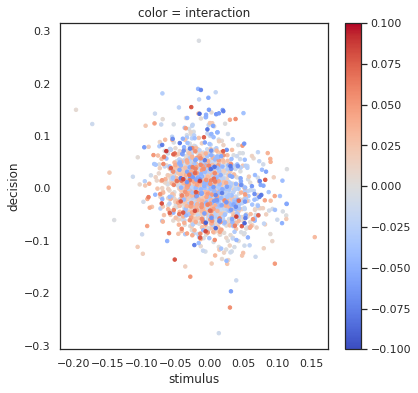

In [24]:
# print((dpca.D['s'] + dpca.D['st'])[:, 0].shape)

plt.rcParams['figure.figsize'] = (6, 6)
# inds_pos_r2 = np.where(r2_dpca > 0)[0]
# sns.jointplot((dpca.D['s'] + dpca.D['st'])[inds_pos_r2, 0],
#             (dpca.D['d'] + dpca.D['dt'])[inds_pos_r2, 0], s=6)

def scale_arr_01(arr):
    arr = np.squeeze(arr)
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

w_pc_s = (dpca.D['s'] + dpca.D['st'])[inds_pos_r2, 0]
w_pc_d = (dpca.D['d'] + dpca.D['dt'])[inds_pos_r2, 0]
w_pc_sd = ((dpca.D['sd'] + dpca.D['sdt'])[inds_pos_r2, 0])

plt.rcParams['figure.figsize'] = (6, 6)
plt.subplots_adjust(wspace=0.5)
# plt.subplot(121)
prev_al = 0
for i_al, al in enumerate(np.arange(0.01, 0.1, 0.01)):
    if al == 0.1:
        sub_inds = np.where(np.abs(w_pc_sd) >= prev_al)[0]
    else:
        sub_inds = np.where(np.logical_and(np.abs(w_pc_sd) < al, 
                                      np.abs(w_pc_sd) >= prev_al))[0]
    curr_alpha = (al * 10) ** 1.5
    prev_al = al
    plt.scatter(w_pc_s[sub_inds], w_pc_d[sub_inds], c=w_pc_sd[sub_inds],
                 s=12, cmap='coolwarm', vmin=-0.1, vmax=0.1)#, alpha=curr_alpha);
plt.colorbar(); plt.xlabel('stimulus');plt.ylabel('decision');
plt.title('color = interaction')

# plt.subplot(122)
# sns.regplot(w_pc_s + w_pc_d, w_pc_sd, scatter_kws={'s': 8})
# plt.xlabel('stimulus + decision'); plt.ylabel('interaction');

array([696])

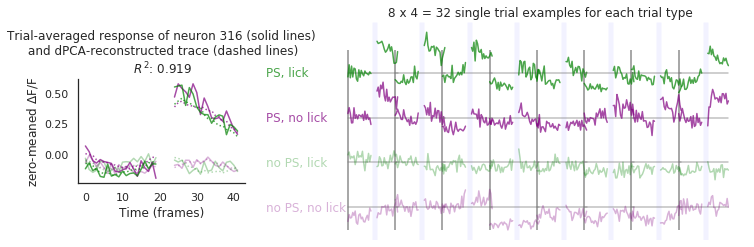

In [117]:
save_fig = True
select_new = False
plt.rcParams['figure.figsize'] = (12, 4)
if select_new:
    # neuron_ids = inds_pos_r2[np.where(w_pc_sd < -0.1)[0]]  # lick, no ps
    neuron_ids = np.where(r2_dpca > 0.8)[0]
    if len(neuron_ids) == 1:
        neuron_id = neuron_ids[0]
    else:
        print(f'There are {len(neuron_ids)} neurons that confirm')
        neuron_id = np.random.choice(neuron_ids, size=1)[0]
else:
    neuron_id = 316
        
        
plt.subplots_adjust(wspace=0.5)
plt.subplot(4, 3, (4, 7))
for stim in [0, 1]:
    for dec in [0, 1]:
        plt.plot(filter_ps_array[:art_gap_start], activity_av[neuron_id, stim, dec, :art_gap_start], 
                 label=f'stim{stim}_dec{dec}', c=dec_color[dec], alpha=stim_alpha[stim])
        plt.plot(filter_ps_array[:art_gap_start], recon['full'][neuron_id, stim, dec, :art_gap_start], 
                 c=dec_color[dec], alpha=stim_alpha[stim], linestyle=':')
        
        plt.plot(filter_ps_array[art_gap_start:], activity_av[neuron_id, stim, dec, art_gap_start:], 
                 c=dec_color[dec], alpha=stim_alpha[stim])
        plt.plot(filter_ps_array[art_gap_start:], recon['full'][neuron_id, stim, dec, art_gap_start:], 
                 c=dec_color[dec], alpha=stim_alpha[stim], linestyle=':')
        
# plt.legend(); 
plt.xlabel('Time (frames)'); plt.ylabel('zero-meaned $\Delta$F/F')
plt.title(f'Trial-averaged response of neuron {neuron_id} (solid lines)' +
          f'\n and dPCA-reconstructed trace (dashed lines)' +
            f'\n $R^2$: {np.round(r2_dpca[neuron_id], 3)}')

st_plot = plt.subplot(1, 3, (2, 3))
plot_y_shift = 4 * np.nanstd(activity[:, neuron_id, :, :, :])
n_examples = 8
start_example = 5
for n_example in range(start_example, start_example + n_examples):
    y_shift = 0
    x_shift = (len(filter_ps_array) + 1) * n_example
    for stim in [0, 1]:
        for dec in [0, 1]:
            st_plot.plot(filter_ps_array[np.array([0, -1])] + x_shift, 
                     [y_shift, y_shift], color='grey', alpha=0.5)
            st_plot.plot(filter_ps_array[:art_gap_start] + x_shift, 
                     activity[n_example, neuron_id, stim, dec, :art_gap_start] + y_shift, 
                     c=dec_color[dec], alpha=stim_alpha[stim])
            st_plot.plot(filter_ps_array[art_gap_start:] + x_shift, 
                     activity[n_example, neuron_id, stim, dec, art_gap_start:] + y_shift, 
                     c=dec_color[dec], alpha=stim_alpha[stim])
            y_shift += plot_y_shift
            if n_example == start_example:
                plt.text(s=f'{label_cond["stim"][stim]}, {label_cond["dec"][dec]}', 
                         y=y_shift - (plot_y_shift * 4 * 0.27), x=x_shift - 68, color=dec_color[dec], alpha=stim_alpha[stim])
    st_plot.vlines(x=x_shift, ymax= 3.5 * plot_y_shift, ymin= -0.5 * plot_y_shift, alpha=0.5)
    st_plot.axvspan(art_gap_start + x_shift, art_gap_stop + x_shift,
                facecolor='blue', alpha=0.05)
st_plot.set_title(f' {n_examples} x 4 = {n_examples * 4} single trial examples for each trial type'); 
# plt.xlabel('Time (frames)')
st_plot.set_yticks([]); st_plot.set_xticks([])
st_plot.axis('off')
sns.despine()

if save_fig:
    plt.savefig(f'dPCA_results/single_neuron_examples/dPCA_{mouse}_{run_number}_reg{reg_param_str_sn}_neuron{neuron_id}.pdf') 

In [39]:
neuron_id_r2inds = np.where(inds_pos_r2 == neuron_id)[0]
print(w_pc_d[neuron_id_r2inds], w_pc_s[neuron_id_r2inds], w_pc_sd[neuron_id_r2inds])

[0.07344697] [0.03304095] [0.02988069]


## Does dimensionality change pre vs post stimulus?

In [65]:
dpca_rew, Z_rew = {}, {}
n_comps = 10
pre_rew_trials_half, pre_rew_trials_half_av = {}, {}
assert pre_rew_trials.shape[2] == (2 * pre_frames)
# pre_rew_trials_half['pre'] = np.swapaxes(pre_rew_trials[:, :, :pre_frames], 0, 1)
# pre_rew_trials_half['post'] = np.swapaxes(pre_rew_trials[:, :, pre_frames:], 0, 1)
# pre_rew_trials_half['full'] = np.swapaxes(pre_rew_trials[:, :, :], 0, 1)
pre_rew_trials_half['pre'] = activity[:, :, 0, 1, :art_gap_start]
pre_rew_trials_half['post'] = activity[:, :, 0, 1, art_gap_start:]
pre_rew_trials_half['full'] = activity[:, :, 0, 1, :]
for rewc in pre_rew_trials_half.keys():
    pre_rew_trials_half_av[rewc] = np.nanmean(pre_rew_trials_half[rewc], 0)
    dpca_rew[rewc] = dPCA.dPCA(labels='t', n_components=n_comps, 
                               regularizer=0)  # 0.5 / pre_rew_trials_half[rewc].shape[2])
    dpca_rew[rewc].protect = ['t']
    Z_rew[rewc] = dpca_rew[rewc].fit_transform(pre_rew_trials_half_av[rewc], 
                                               pre_rew_trials_half[rewc])

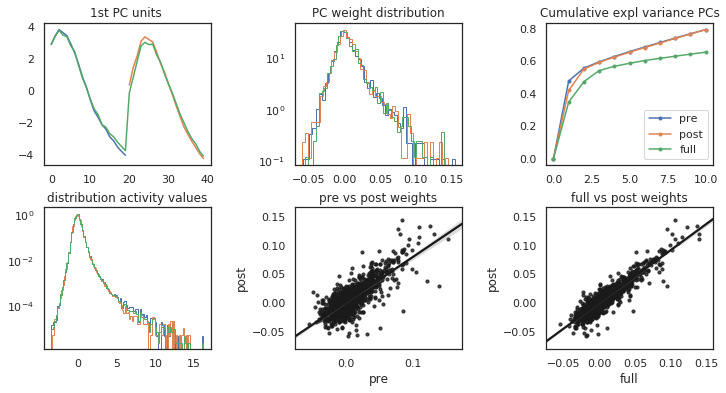

In [66]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
for rewc in pre_rew_trials_half.keys():
    plt.subplot(231)
    tmp_x_arr = np.arange(len(Z_rew[rewc]['t'][0, :]))
    if rewc == 'post':
        tmp_x_arr += len(Z_rew['pre']['t'][0, :])
    plt.plot(tmp_x_arr, Z_rew[rewc]['t'][0, :], 
             label=rewc + f' $R^2$={np.round(dpca_rew[rewc].explained_variance_ratio_["t"][0], 3)}')
    plt.title('1st PC units ')
    
    
    plt.subplot(232)
    plt.hist(dpca_rew[rewc].D['t'][:, 0], bins=50, density=True, histtype='step', label=rewc)
    plt.yscale('log'); plt.title('PC weight distribution')
    
    plt.subplot(233)
    plt.plot(np.arange(0, n_comps + 1), np.concatenate((np.array([0]), np.cumsum(dpca_rew[rewc].explained_variance_ratio_['t']))),
             '.-', label=rewc)
#     plt.ylim([0, .5]);
    plt.title('Cumulative expl variance PCs')
    plt.legend()
    
    plt.subplot(234)
    plt.hist(pre_rew_trials_half[rewc].reshape(-1), bins=100, density=True, histtype='step')
    plt.title('distribution activity values')
    plt.yscale('log')

plt.subplot(235)
sns.regplot(dpca_rew['pre'].D['t'][:, 0], dpca_rew['post'].D['t'][:, 0], color='k', scatter_kws={'s': 10})
plt.title('pre vs post weights'); plt.xlabel('pre'); plt.ylabel('post')


plt.subplot(236)
sns.regplot(dpca_rew['full'].D['t'][:, 0], dpca_rew['post'].D['t'][:, 0], color='k', scatter_kws={'s': 10})
plt.title('full vs post weights'); plt.xlabel('full'); plt.ylabel('post');

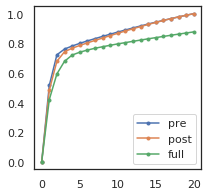

In [67]:
plt.rcParams['figure.figsize'] = (3, 3)

for regw in ['pre', 'post', 'full']:
    pca = sklearn.decomposition.PCA(n_components=20)
    pc = pca.fit_transform(pre_rew_trials_half_av[regw])
#     plt.plot(pca.components_[0, :].T)
    plt.plot(np.cumsum(np.concatenate((np.array([0]), 
                             pca.explained_variance_ratio_.copy()))), '.-', label=regw)
    plt.legend()
    